# Plot population heatmap

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gpt
import matplotlib.pyplot as plt
import dataloader

## Get San Diego map

In [3]:
with open('./data/SanDiego_zipcode.txt', 'r') as f:
    zips = f.readline().strip().replace(',', '').split()
county = gpd.read_file('./data/san_diego_zip_codes.geojson')
san_diego = county[county['zip'].isin(zips)]
san_diego = san_diego.reset_index()
san_diego.rename(columns = {'zip':'address_zip'}, inplace = True)

## Import population data and combine with map

/Users/hundredball/anaconda3/envs/ProgDS/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hundredball/anaconda3/envs/ProgDS/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


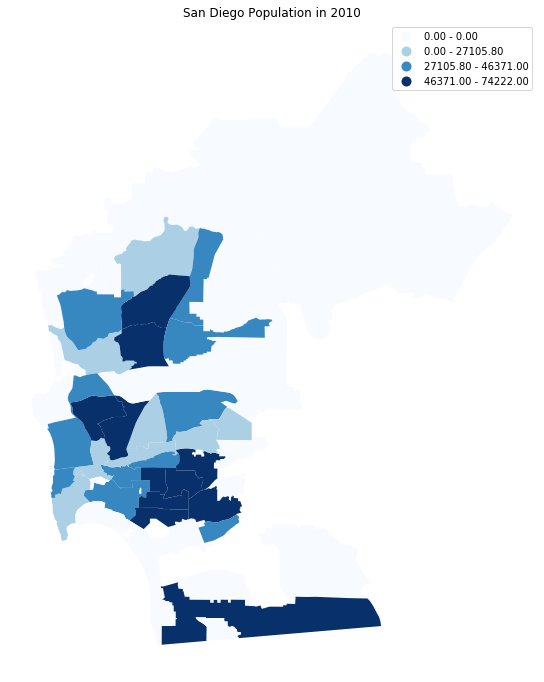

In [25]:
pop_df = pd.read_csv('./data/SanDiego_population.csv')
pop_df['address_zip'] = pop_df['address_zip'].astype(str)

pop_san_diego = san_diego.merge(pop_df, on = 'address_zip', how = 'outer')
pop_san_diego.fillna({'population':0, 'density':0}, inplace=True)
ax = pop_san_diego.plot(column = 'population', scheme = 'quantiles', legend=True, cmap = 'Blues', figsize=(20,12))
plt.axis('off')
plt.title('San Diego Population in 2010')
plt.savefig('./heatmaps/population_heatmap.png')
plt.show()

## Plot density heatmap

/Users/hundredball/anaconda3/envs/ProgDS/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hundredball/anaconda3/envs/ProgDS/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


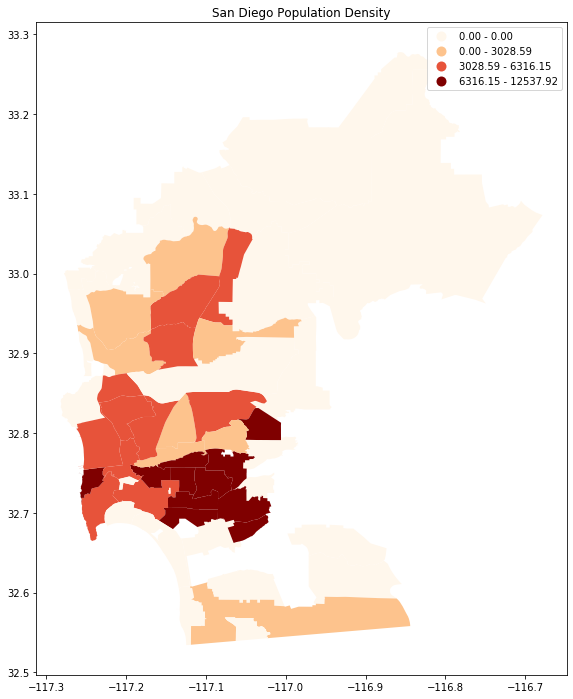

In [18]:
ax = pop_san_diego.plot(column = 'density', scheme = 'quantiles', legend=True, cmap = 'OrRd', figsize=(20,12))
plt.title('San Diego Population Density')
plt.savefig('./heatmaps/population_density_heatmap.png')
plt.show()